In [2]:
import numpy as np
import pandas as pd
from google.colab import drive

drive.mount('/content/drive',force_remount=True)
data = pd.read_excel('/content/drive/My Drive/TA/data/data_bawang_merah.xlsx')
data.head()

Mounted at /content/drive


,id,bulan,luastanaman_bulanlalu,luas_panen_habis,tambah_tanam,luastanaman_akhirbulan,produksi_habis,harga
0,1,1,689.0,89.0,191.0,791.0,7334.63,23000.0
1,2,2,791.0,528.0,232.5,495.5,42590.65,25000.0
2,3,3,495.5,70.0,203.0,628.5,5253.49,19000.0
3,4,4,628.5,195.0,61.0,494.5,12141.49,10000.0
4,5,5,494.5,268.5,25.0,251.0,21211.20,13800.0


In [3]:
data = data.drop(data.columns[[0, 1]],axis=1)
data.head()

,luastanaman_bulanlalu,luas_panen_habis,tambah_tanam,luastanaman_akhirbulan,produksi_habis,harga
0,689.0,89.0,191.0,791.0,7334.63,23000.0
1,791.0,528.0,232.5,495.5,42590.65,25000.0
2,495.5,70.0,203.0,628.5,5253.49,19000.0
3,628.5,195.0,61.0,494.5,12141.49,10000.0
4,494.5,268.5,25.0,251.0,21211.20,13800.0


In [4]:
x = data.iloc[:, :-1]
x.head()

,luastanaman_bulanlalu,luas_panen_habis,tambah_tanam,luastanaman_akhirbulan,produksi_habis
0,689.0,89.0,191.0,791.0,7334.63
1,791.0,528.0,232.5,495.5,42590.65
2,495.5,70.0,203.0,628.5,5253.49
3,628.5,195.0,61.0,494.5,12141.49
4,494.5,268.5,25.0,251.0,21211.20


In [5]:
y = data.iloc[:, -1]
y.head()

0    23000.0
1    25000.0
2    19000.0
3    10000.0
4    13800.0
Name: harga, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Regresi

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [9]:
y_pred = regressor.predict(x_test)
y_pred

array([12955.10520783, 14471.65512041, 15836.87940959, 14387.72801269,
       14529.11542095, 14448.37139033, 14703.29766311, 13320.96804724,
       14573.92801908, 15061.83099897])

In [10]:
coef_dict = {
    'features': x.columns,
    'coef_value': regressor.coef_
}
coef = pd.DataFrame(coef_dict, columns=['features','coef_value'])
coef

,features,coef_value
0,luastanaman_bulanlalu,-13.569840
1,luas_panen_habis,-38.472684
2,tambah_tanam,-10.809338
3,luastanaman_akhirbulan,14.093506
4,produksi_habis,0.647262


In [23]:
print(regressor.coef_)
print(regressor.intercept_)

[-13.56983992 -38.47268409 -10.80933831  14.09350585   0.64726249]
14515.405997096219


RMSE

In [11]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("RMSE : ", rmse)

RMSE :  3609.941181159199


# **Dengan** **Normalisasi**

In [12]:
dt = pd.read_excel('/content/drive/My Drive/TA/data/data_bawang_merah.xlsx')
dt = dt.drop(dt.columns[[0, 1]],axis=1)

Min Max

In [13]:
dt['luas_panen_habis'] = (dt['luas_panen_habis'] - dt['luas_panen_habis'].min()) / (dt['luas_panen_habis'].max() - dt['luas_panen_habis'].min())
dt['luastanaman_bulanlalu'] = (dt['luastanaman_bulanlalu'] - dt['luastanaman_bulanlalu'].min()) / (dt['luastanaman_bulanlalu'].max() - dt['luastanaman_bulanlalu'].min())
dt['tambah_tanam'] = (dt['tambah_tanam'] - dt['tambah_tanam'].min()) / (dt['tambah_tanam'].max() - dt['tambah_tanam'].min())
dt['luastanaman_akhirbulan'] = (dt['luastanaman_akhirbulan'] - dt['luastanaman_akhirbulan'].min()) / (dt['luastanaman_akhirbulan'].max() - dt['luastanaman_akhirbulan'].min())
dt['produksi_habis'] = (dt['produksi_habis'] - dt['produksi_habis'].min()) / (dt['produksi_habis'].max() - dt['produksi_habis'].min())

In [14]:
dt.head()

,luastanaman_bulanlalu,luas_panen_habis,tambah_tanam,luastanaman_akhirbulan,produksi_habis,harga
0,0.856784,0.163810,0.345588,0.984925,0.167816,23000.0
1,0.984925,1.000000,0.421875,0.613693,1.000000,25000.0
2,0.613693,0.127619,0.367647,0.780779,0.118693,19000.0
3,0.780779,0.365714,0.106618,0.612437,0.281277,10000.0
4,0.612437,0.505714,0.040441,0.306533,0.495359,13800.0


In [15]:
from sklearn.model_selection import train_test_split
x = dt.iloc[:, :-1]
y = dt.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Regresi

In [16]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
print(y_pred)

[12955.10520783 14471.65512041 15836.87940959 14387.72801269
 14529.11542095 14448.37139032 14703.29766311 13320.96804724
 14573.92801908 15061.83099897]


In [17]:
coef_dict = {
    'features': x.columns,
    'coef_value': regr.coef_
}
coef = pd.DataFrame(coef_dict, columns=['features','coef_value'])
coef

,features,coef_value
0,luastanaman_bulanlalu,-6419.516554
1,luas_panen_habis,-23088.347479
2,tambah_tanam,-2885.494416
3,luastanaman_akhirbulan,6836.354633
4,produksi_habis,27421.696117


In [18]:
print(regr.coef_)
print(regr.intercept_)

[ -6419.51655367 -23088.34747906  -2885.49441561   6836.35463278
  27421.69611721]
14516.859651693847


In [19]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("RMSE : ", rmse)

RMSE :  3609.941181159245


# **Korelasi**

In [20]:
data.corr()

,luastanaman_bulanlalu,luas_panen_habis,tambah_tanam,luastanaman_akhirbulan,produksi_habis,harga
luastanaman_bulanlalu,1.000000,0.770738,0.281025,0.763836,0.774071,0.102316
luas_panen_habis,0.770738,1.000000,0.039805,0.289896,0.988139,0.085258
tambah_tanam,0.281025,0.039805,1.000000,0.752142,0.039362,0.065338
luastanaman_akhirbulan,0.763836,0.289896,0.752142,1.000000,0.299364,0.092444
produksi_habis,0.774071,0.988139,0.039362,0.299364,1.000000,0.114968
harga,0.102316,0.085258,0.065338,0.092444,0.114968,1.000000


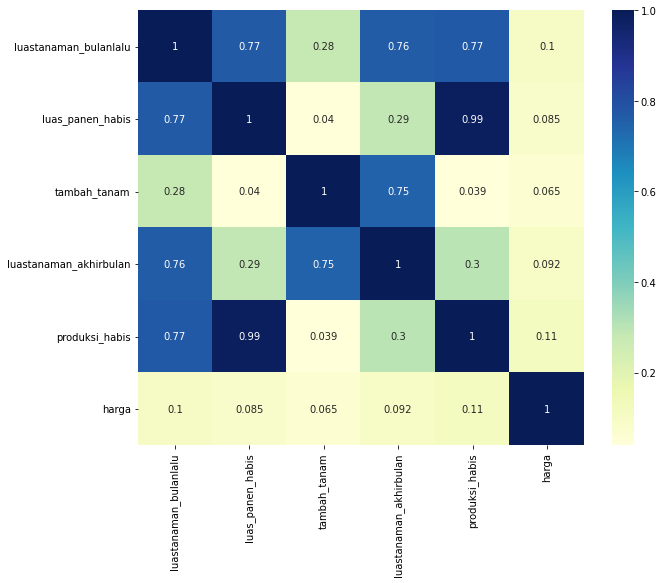

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt = plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()